## Inference

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split


2025-01-17 01:22:09.968136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 01:22:10.147144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737057130.210790  105016 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737057130.228291  105016 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 01:22:10.383294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Load data using the provided load_data.py script
def load_data():
    data0 = np.load('../DL-Project/data0.npy')
    data1 = np.load('../DL-Project/data1.npy')
    data2 = np.load('../DL-Project/data2.npy')
    lab0 = np.load('../DL-Project/lab0.npy')
    lab1 = np.load('../DL-Project/lab1.npy')
    lab2 = np.load('../DL-Project/lab2.npy')

    # Combine data and labels
    data = np.concatenate([data0, data1, data2], axis=0)
    labels = np.concatenate([lab0, lab1, lab2], axis=0)

    return data, labels

In [4]:
def preprocess_data(data, labels):
    # Normalize images to the range [0, 1]
    data = data / 255.0
    # Add channel dimension for grayscale images
    data = np.expand_dims(data, axis=-1)
    # Add noise for robustness
    noise_factor = 0.05
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    data = np.clip(noisy_data, 0., 1.)
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        data, labels, test_size=0.2, random_state=42
    )
    return X_train, X_val, y_train, y_val

In [5]:
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    print("predictions")
    # Calculate various metrics
    mse = np.mean((y_val - predictions.flatten()) ** 2)
    mae = np.mean(np.abs(y_val - predictions.flatten()))
    rmse = np.sqrt(mse)

    print(y_val.shape)
    print(predictions.shape)
    
    # Calculate accuracy within different thresholds
    accuracy_1 = np.mean(np.abs(y_val - predictions.flatten()) <= 0.5) * 100
    accuracy_2 = np.mean(np.abs(y_val - predictions.flatten()) <= 1.0) * 100
    accuracy_3 = np.mean(np.abs(y_val - predictions.flatten()) <= 2.0) * 100
    
    print(f"Validation Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Validation Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Accuracy (±0.5 digit): {accuracy_1:.1f}%")
    print(f"Accuracy (±1 digits): {accuracy_2:.1f}%")
    print(f"Accuracy (±2 digits): {accuracy_3:.1f}%")
    
    # Visualize predictions with error
    plt.figure(figsize=(15, 6))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_val[i].squeeze(), cmap='gray')
        error = abs(y_val[i] - predictions[i][0])
        color = 'green' if error <= 1.0 else 'red'
        plt.title(f"True: {y_val[i]:.1f}\nPred: {predictions[i][0]:.1f}\nErr: {error:.1f}", 
                 color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return predictions


In [6]:
model = load_model('best_model_regression.keras')

2025-01-17 01:22:18.651877: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
data, labels = load_data()
X_train, X_val, y_train, y_val = preprocess_data(data, labels)


I0000 00:00:1737057157.224018  105174 service.cc:148] XLA service 0x7f180802da80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737057157.224444  105174 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-01-17 01:22:37.252335: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737057157.422478  105174 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 351s 374ms/step
predictions
(30000,)
(30000, 1)
Validation Mean Absolute Error (MAE): 0.35
Validation Root Mean Squared Error (RMSE): 0.50
Accuracy (±0.5 digit): 76.3%
Accuracy (±1 digits): 96.3%
Accuracy (±2 digits): 99.5%


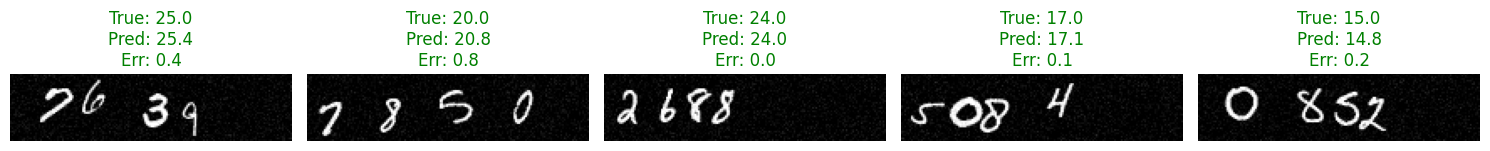

array([[25.364994],
       [20.76908 ],
       [23.95864 ],
       ...,
       [22.232527],
       [19.259676],
       [17.376953]], dtype=float32)

In [8]:
evaluate_model(model, np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

188/188 ━━━━━━━━━━━━━━━━━━━━ 66s 354ms/step
Validation Mean Absolute Error (MAE): 0.43
Validation Root Mean Squared Error (RMSE): 0.64
Accuracy (±0.5 digit): 70.3%
Accuracy (±1 digits): 93.1%
Accuracy (±2 digits): 98.6%


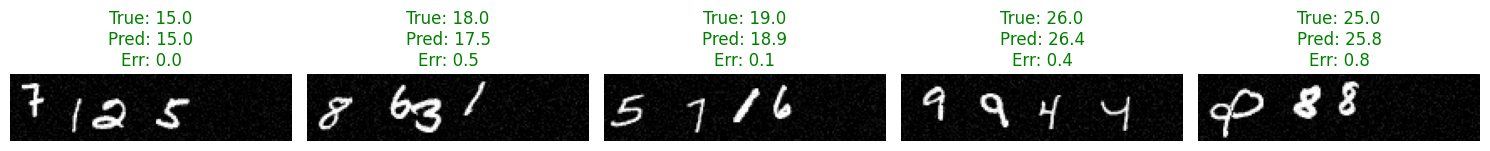

array([[15.024372],
       [17.476986],
       [18.858686],
       ...,
       [22.276068],
       [19.243868],
       [17.227762]], dtype=float32)

In [11]:
evaluate_model(model, X_val, y_val)